Importando o pandas e o matplot

# Sharpe Ratio and Portfolio Values

In [1]:
import pandas as pd

In [2]:
# import quandl

In [3]:
import yfinance as yf

## Create a Portfolio

In [4]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')  # não tem negociação nesse dia

In [5]:
# Grabbing a bunch of tech stocks for our portfolio
# aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
# cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
# ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
# amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [6]:
aapl =  yf.download("AAPL", start, end)
msft =  yf.download("MSFT", start, end)
ibm =  yf.download("IBM", start, end)
amzn =  yf.download("AMZN", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
# Alternative
#aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
#msft = pd.read_csv('MSFT_CLOSE',index_col='Date',parse_dates=True)
#ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
#amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [8]:
#aapl.to_csv('AAPL_CLOSE')
#msft.to_csv('MSFT_CLOSE')
#ibm.to_csv('IBM_CLOSE')
#amzn.to_csv('AMZN_CLOSE')

In [9]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.7945,8.9740,8.7775,8.9515,8.9515,102216000
2012-01-04,8.9605,9.0250,8.8035,8.8755,8.8755,84104000
2012-01-05,8.7970,8.9125,8.7025,8.8805,8.8805,76182000
2012-01-06,8.9035,9.2325,8.8750,9.1305,9.1305,140168000
2012-01-09,9.1380,9.2185,8.8500,8.9280,8.9280,101138000


## Normalize Prices

This is the same as cumulative daily returns

In [10]:
# Example
amzn.iloc[0]['Adj Close']

8.951499938964844

In [11]:
print(aapl.count())
print(msft.count())
print(ibm.count())
print(amzn.count())

Open         1258
High         1258
Low          1258
Close        1258
Adj Close    1258
Volume       1258
dtype: int64
Open         1258
High         1258
Low          1258
Close        1258
Adj Close    1258
Volume       1258
dtype: int64
Open         1258
High         1258
Low          1258
Close        1258
Adj Close    1258
Volume       1258
dtype: int64
Open         1258
High         1258
Low          1258
Close        1258
Adj Close    1258
Volume       1258
dtype: int64


In [12]:
# criando para cada dataframe e de modo automatico, uma nova coluna. Na hora de imprimir, imprime o último.
for stock_df in (aapl,msft,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [13]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Normed Return'], dtype='object')

In [14]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433823,302220800,1.000000
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000,1.005375
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600,1.016536
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771552,318292800,1.027162
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751297,394024400,1.025533


In [15]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200514,64731500,1.000000
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699446,80516100,1.023534
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921190,56081400,1.033993
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261728,99455500,1.050056
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968706,59706800,1.036235


In [16]:
ibm.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2012-01-03,178.518158,180.411087,177.820267,178.107071,110.805687,5905716,1.000000
2012-01-04,177.409180,178.135757,176.806885,177.380493,110.353691,4546648,0.995921
2012-01-05,176.682602,176.892929,175.047806,176.539200,109.830276,4668403,0.991197
2012-01-06,176.281067,176.367111,174.292542,174.512421,108.569351,5122367,0.979818
2012-01-09,174.187378,174.254303,172.342255,173.604202,108.004349,5440455,0.974718


In [17]:
amzn.head()


,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2012-01-03,8.7945,8.9740,8.7775,8.9515,8.9515,102216000,1.000000
2012-01-04,8.9605,9.0250,8.8035,8.8755,8.8755,84104000,0.991510
2012-01-05,8.7970,8.9125,8.7025,8.8805,8.8805,76182000,0.992068
2012-01-06,8.9035,9.2325,8.8750,9.1305,9.1305,140168000,1.019997
2012-01-09,9.1380,9.2185,8.8500,8.9280,8.9280,101138000,0.997375


In [18]:
ibm.tail()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2016-12-23,159.655838,160.124283,159.130020,159.378586,112.855713,1779455,1.018501
2016-12-27,159.636703,160.592728,159.512421,159.789673,113.146790,1461785,1.021128
2016-12-28,159.933075,160.363297,158.699814,158.881454,112.503685,1838345,1.015324
2016-12-29,158.718933,159.646271,158.699814,159.273422,112.781250,1740021,1.017829
2016-12-30,159.120453,159.369019,158.221802,158.690247,112.368301,3088629,1.014102


In [19]:
amzn.count()

Open             1258
High             1258
Low              1258
Close            1258
Adj Close        1258
Volume           1258
Normed Return    1258
dtype: int64

In [20]:
# para ver que a coluna foi acrescentada
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2016-12-23,38.227501,38.325001,37.899502,38.029499,38.029499,39632000,4.248394
2016-12-27,38.169998,38.732498,38.060001,38.570000,38.570000,52774000,4.308775
2016-12-28,38.812500,39.000000,38.525002,38.606499,38.606499,66020000,4.312852
2016-12-29,38.619999,38.669998,38.042500,38.257500,38.257500,63166000,4.273865
2016-12-30,38.323502,38.369999,37.414001,37.493500,37.493500,82788000,4.188516


In [21]:
aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.075239,56998000,2.177547
2016-12-27,29.129999,29.450001,29.122499,29.315001,27.247198,73187600,2.191377
2016-12-28,29.379999,29.504999,29.049999,29.190001,27.131012,83623600,2.182033
2016-12-29,29.112499,29.277500,29.100000,29.182501,27.124037,60158000,2.181472
2016-12-30,29.162500,29.299999,28.857500,28.955000,26.912586,122345200,2.164466


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Microsoft
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [22]:
#import numpy as np
# pesos para o maior SR, de acordo com a aula 02
#weights = [0.26188068, 0.20759516, 0.00110226, 0.5294219 ]
#weights = np.around(weights / np.sum(weights),4)
#print(weights)

In [23]:
for stock_df,allo in zip([aapl,msft,amzn,ibm],[.3,.2,.4,.1]):
#for stock_df,allo in zip([aapl,msft,ibm,amzn],[.2619,.2076,.0011,.5294]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [24]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation
Date,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433823,302220800,1.000000,0.300000
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000,1.005375,0.301612
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600,1.016536,0.304961
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771552,318292800,1.027162,0.308149
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751297,394024400,1.025533,0.307660


## Investment

Let's pretend we invested a million dollars in this portfolio

In [25]:
# o capital se distribui de acordo com os pesos. Se os pesos fossem todos iguais a um, seria
# como se investir esse valor vezes o número de acoes
for stock_df in [aapl,msft,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Total Portfolio Value

In [26]:
portfolio_val = round(pd.concat([aapl['Position Values'],msft['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1),2)

In [27]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.00,200000.00,100000.00,400000.00
2012-01-04,301612.36,204706.79,99592.08,396603.91
2012-01-05,304960.77,206798.67,99119.71,396827.34
2012-01-06,308148.65,210011.21,97981.75,407998.66
2012-01-09,307659.94,207246.92,97471.85,398949.92


In [28]:
portfolio_val.columns = ['AAPL Pos','MSFT Pos','IBM Pos','AMZN Pos']

In [29]:
portfolio_val.head()

,AAPL Pos,MSFT Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.00,200000.00,100000.00,400000.00
2012-01-04,301612.36,204706.79,99592.08,396603.91
2012-01-05,304960.77,206798.67,99119.71,396827.34
2012-01-06,308148.65,210011.21,97981.75,407998.66
2012-01-09,307659.94,207246.92,97471.85,398949.92


In [30]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [31]:
portfolio_val.head()

,AAPL Pos,MSFT Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.00,200000.00,100000.00,400000.00,1000000.00
2012-01-04,301612.36,204706.79,99592.08,396603.91,1002515.14
2012-01-05,304960.77,206798.67,99119.71,396827.34,1007706.49
2012-01-06,308148.65,210011.21,97981.75,407998.66,1024140.27
2012-01-09,307659.94,207246.92,97471.85,398949.92,1011328.63


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

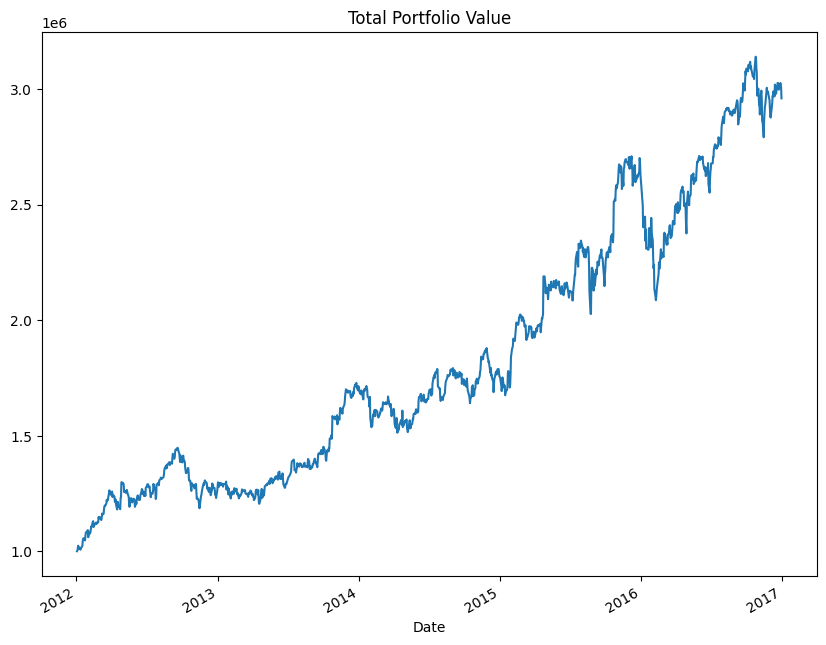

In [33]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

In [34]:
# Cálculo do DD. Fazer


In [35]:
# AAPL Pos 	MSFT Pos 	IBM Pos 	AMZN Pos 	Total Pos. Cálculo do Maximo DD e respectiva data.


<Axes: xlabel='Date'>

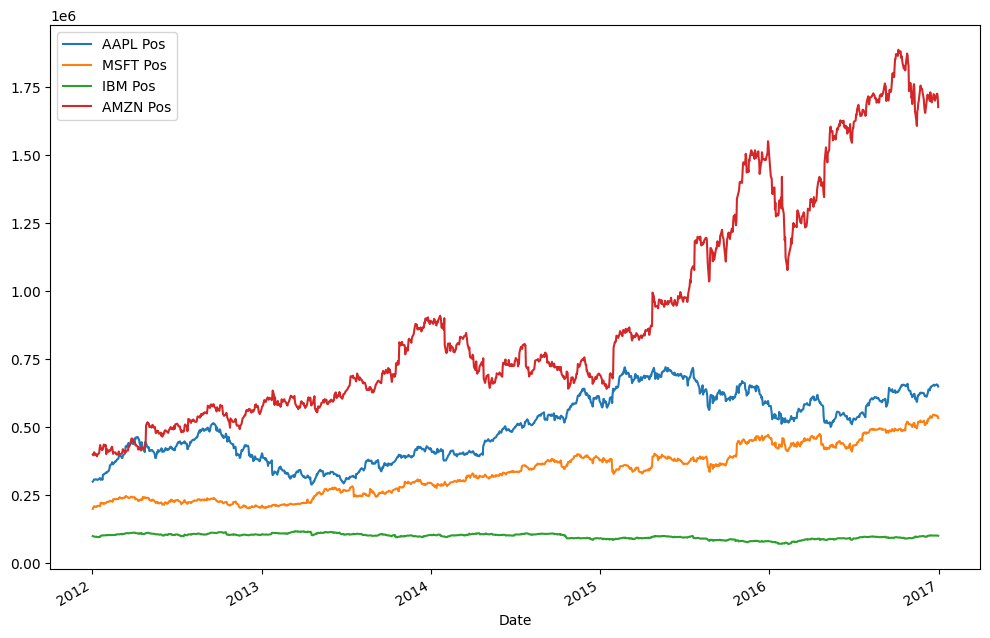

In [36]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line', figsize=(12,8))

In [37]:
portfolio_val.head()

,AAPL Pos,MSFT Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.00,200000.00,100000.00,400000.00,1000000.00
2012-01-04,301612.36,204706.79,99592.08,396603.91,1002515.14
2012-01-05,304960.77,206798.67,99119.71,396827.34,1007706.49
2012-01-06,308148.65,210011.21,97981.75,407998.66,1024140.27
2012-01-09,307659.94,207246.92,97471.85,398949.92,1011328.63


In [38]:
portfolio_val.tail()

,AAPL Pos,MSFT Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.25,542732.00,101850.11,1699357.62,2997203.98
2016-12-27,657413.22,543075.32,102112.80,1723510.02,3026111.36
2016-12-28,654609.92,540586.50,101532.41,1725140.99,3021869.82
2016-12-29,654441.62,539814.23,101782.91,1709545.88,3005584.64
2016-12-30,649339.80,533291.72,101410.23,1675406.36,2959448.11


# Portfolio Statistics
### Daily Returns

In [ ]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val['Daily Return'].head()

Date
2012-01-03         NaN
2012-01-04    0.002515
2012-01-05    0.005178
2012-01-06    0.016308
2012-01-09   -0.012510
Name: Daily Return, dtype: float64

### Cumulative Return

In [ ]:
portfolio_val.iloc[-1]['Total Pos']

2959447.8200000003

In [ ]:
portfolio_val.iloc[0]['Total Pos']

1000000.0

* lembrando que retorno = (Pt/Pt-1) -1 então o retorno total será = (Pfinal / Pinicial) - 1

In [ ]:
# aqui, além de cumulativo, refere-se a todo o período.
cum_ret = round(100 * (portfolio_val.iloc[-1]['Total Pos']/portfolio_val.iloc[0]['Total Pos'] -1 ),2)
print('Our return  was {} percent!'.format(cum_ret))

Our return  was 195.94 percent!


### Avg Daily Return

In [ ]:
# variação diária da soma das alocações das quatro ações. Coluna Total Pos
round(portfolio_val['Daily Return'].mean(),5)

0.00095

### Std Daily Return

In [ ]:
round(portfolio_val['Daily Return'].std(),4)

0.0129

<Axes: ylabel='Density'>

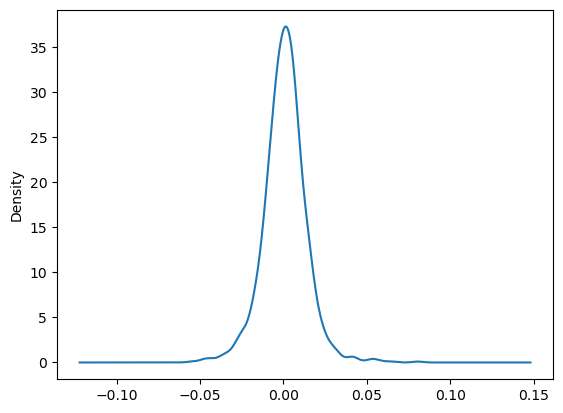

In [ ]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [ ]:
SR = round(portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std(),3)


In [ ]:
SR

0.073

In [ ]:
# Annualized Sharpe Ratio = K-value * SR
ASR = round((252**0.5)*SR,3)

In [ ]:
ASR

1.159

In [ ]:
round(portfolio_val['Daily Return'].std(),3)


0.013

In [ ]:
round(portfolio_val['Daily Return'].mean(),5)


0.00095

<Axes: ylabel='Density'>

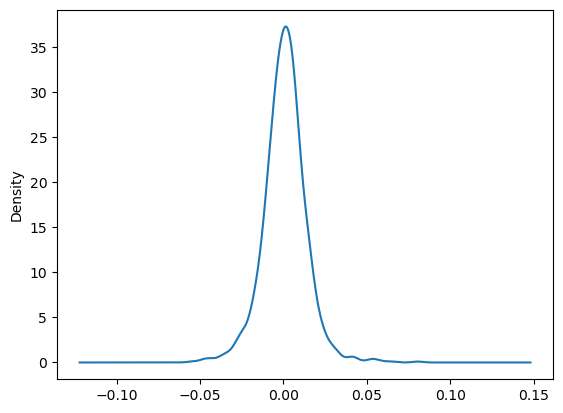

In [ ]:
portfolio_val['Daily Return'].plot(kind='kde')

<Axes: ylabel='Density'>

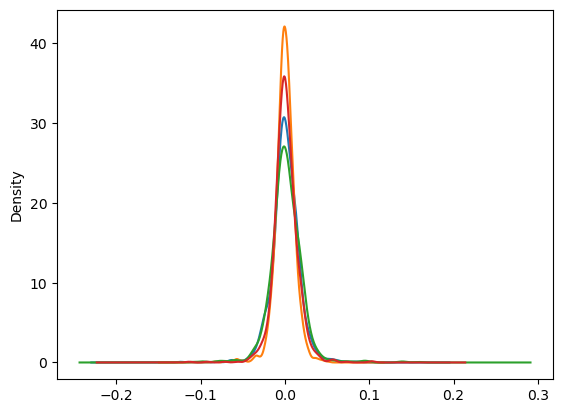

In [ ]:
aapl['Adj Close'].pct_change(1).plot(kind='kde')
ibm['Adj Close'].pct_change(1).plot(kind='kde')
amzn['Adj Close'].pct_change(1).plot(kind='kde')
msft['Adj Close'].pct_change(1).plot(kind='kde')

# Atividade 10 - Kevin Cerqueria

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

Todas as ações

In [ ]:
tickers = ['AAPL', 'MSFT', 'IBM', 'AMZN']

Calculando o Drawdown

[*********************100%%**********************]  3 of 3 completed


              Return
Date                
2012-01-04  0.011074
2012-01-05  0.002483
2012-01-06  0.004115
2012-01-09 -0.019049
2012-01-10  0.002759
Max Drawdown (MDD): -17.00%
Date of Max Drawdown: 2013-04-18 00:00:00


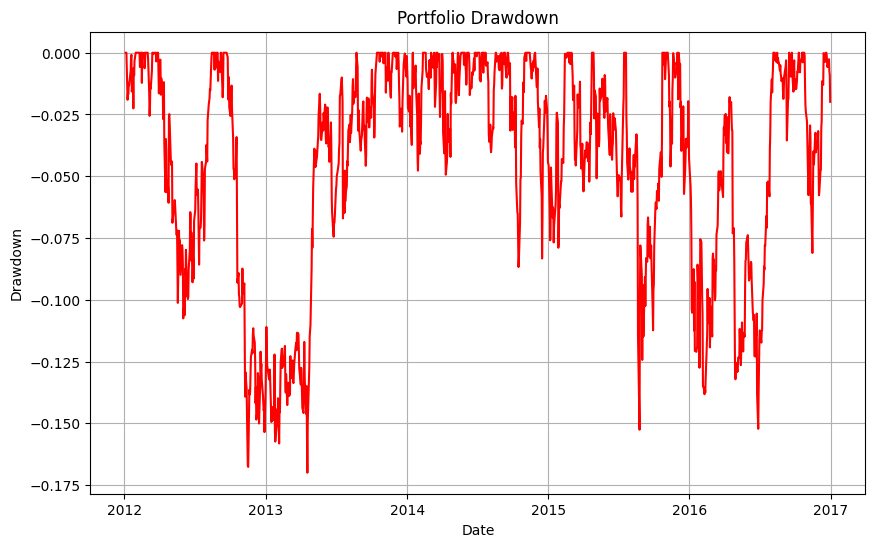

In [41]:
# Baixar os dados de preços das ações
data = yf.download(tickers, start='2012-01-01', end='2017-01-01')['Adj Close']

# Calcular os retornos diários
returns = data.pct_change().dropna()

# Assumindo pesos iguais para simplificar
weights = [1/len(tickers)] * len(tickers)

# Calcular os retornos do portfólio
portfolio_returns = (returns * weights).sum(axis=1)
portfolio = pd.DataFrame(portfolio_returns, columns=['Return'])

# Verificar se a coluna 'Return' foi criada corretamente
print(portfolio.head())

# Calculando o Drawdown
portfolio['Cumulative Return'] = (1 + portfolio['Return']).cumprod()
portfolio['Cumulative Max'] = portfolio['Cumulative Return'].cummax()
portfolio['Drawdown'] = portfolio['Cumulative Return'] / portfolio['Cumulative Max'] - 1

# Calculando o Max Drawdown (MDD)
max_drawdown = portfolio['Drawdown'].min()
max_drawdown_date = portfolio['Drawdown'].idxmin()

print(f"Max Drawdown (MDD): {max_drawdown*100:.2f}%")
print(f"Date of Max Drawdown: {max_drawdown_date}")

# Plotando o gráfico de Drawdown
plt.figure(figsize=(10,6))
plt.plot(portfolio.index, portfolio['Drawdown'], color='red')
plt.title('Portfolio Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()
